In [4]:
# ================= 图像分类数据集 ====================
"""
MNIST数据集是图像分类中广泛使用的数据集之一，
但作为基准数据集过于简单。
我们将使用类似但更复杂的Fashion-MNIST数据集
"""

%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
import matplotlib.pyplot as plt

d2l.use_svg_display()

In [5]:
"""
# 通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中
# 通过ToTensor实例将图像数据集从PIL类型变换为32位浮点数格式
# 并除以255使得所有像素的数值均在0到1之间
"""


# 将图像转换为PyTorch张量
# PIL Image → torch.Tensor
# 像素值从 [0, 255] → [0.0, 1.0]（自动除以255）
# 图像形状从 (H, W, C) → (C, H, W)（PyTorch标准格式）
trans = transforms.ToTensor()

# 训练集加载
mnist_train = torchvision.datasets.FashionMNIST(
    root="./data",      # 数据保存路径
    train=True,          # 加载训练集（60000张图像）
    transform=trans,     # 应用转换
    download=True        # 如果不存在则下载
)
"""
训练集的组成【测试集同理】
1.图像数据
1）数量：60000张时尚物品图像
2）尺寸：每张图像28*28像素，即 28*28 = 784 个特征
3）颜色：灰度图像（黑白）
4）格式：已转为PyTorch张量

2.标签数据
1）数量：60000个标签（与图像一一对应）
2）范围：0-9的整数，代表10个时尚类别
"""

# 测试集加载
mnist_test = torchvision.datasets.FashionMNIST(
    root="./data",      # 同一保存路径
    train=False,         # 加载测试集（10000张图像）
    transform=trans,     # 应用相同转换
    download=True        # 如果不存在则下载
)

len(mnist_train), len(mnist_test)

(60000, 10000)

In [6]:
# 训练集中第一个样本的图像
mnist_train[0][0].shape
print('图像形状', mnist_train[0][0].shape)

"""
分解图像形状的三个维度
[1, 28, 28] = [通道数，高度，宽度]
第一个维度1：灰度图像，1个颜色通道
第二个维度28：图像高度28像素
第三个维度28：图像宽度28像素

总共28*28=784个像素特征，
后续训练参数时需要展平为大小为784的一维向量，作为神经网络的输入
"""

# 训练集中第一个样本
sample = mnist_train[0]
print('样本类型', type(sample))
print('样本大小', len(sample))

# 分解元组
image, label = sample
print('图像类型', type(image))
print('标签类型', type(label))
print('标签值', label)

图像形状 torch.Size([1, 28, 28])
样本类型 <class 'tuple'>
样本大小 2
图像类型 <class 'torch.Tensor'>
标签类型 <class 'int'>
标签值 9


In [7]:
# 两个可视化数据集的函数

# 将 0-9 转换为文本标签，如 0 转为 t-shirt
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in labels]


"""
《绘制图像列表》
参数：
imgs：图像列表，可以是PyTorch张量或numpy数组
num_rows：显示网格的行数
num_cols：显示网格的列数
titles：可选的标题列表，长度应与图像数量匹配
scale：缩放因子，控制每个子图的大小
"""
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    # 计算图形总大小
    figsize = (num_cols * scale, num_rows * scale)
    # 例如：3列 × 1.5 = 4.5英寸宽，2行 × 1.5 = 3英寸高

    # 创建子图网格
    # plt.subplots(行数, 列数, 图形大小)
    # 返回：(图形对象, 坐标轴对象数组)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    # _ 是图形对象（我们暂时不用）
    # axes 是二维数组，形状为 [num_rows, num_cols]

    # 将二维坐标轴数组展平为一维
    axes = axes.flatten()
    # 例如：axes从形状 [2, 3] 变为 [6] 的一维数组

    # 遍历并处理每个图像
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        # 如果图像是PyTorch张量，转换为numpy数组
        if torch.is_tensor(img):
            # PyTorch张量需要转换为numpy数组
            # .numpy(): 张量转numpy
            # .squeeze(): 移除大小为1的维度
            ax.imshow(img.numpy().squeeze(), cmap='gray')
        else:
            ax.imshow(img.squeeze(), cmap='gray')

        # 隐藏坐标轴
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

        # 如果有标题，添加到当前子图
        if titles:
            ax.set_title(titles[i])

    # 自动调整子图间距，防止重叠
    plt.tight_layout()

    # 返回坐标轴对象数组，可以进一步操作
    return axes

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

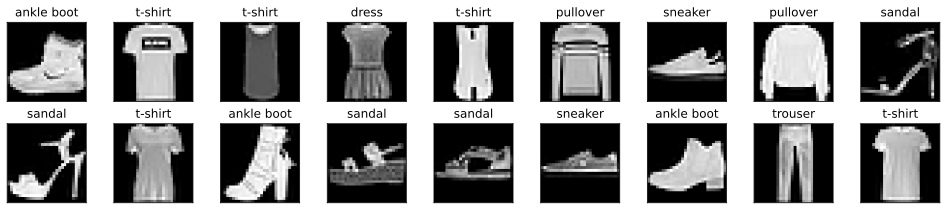

In [8]:
# 几个样本的图像及其相应的标签

""" 
数据加载部分
X 图像张量，形状[18, 1, 28, 28]
y 标签张量，形状[18]
"""
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))

"""
正确重塑形状：从[18, 1, 28, 28]到[18, 28, 28]，因为imshow()需要[H, W]或[H, W, C]格式，故移除通道维度
正确转换标签：将整数标签转换为可读的文本标签
可视化显示：显示2行9列共18个图像
"""
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [12]:
# 读取一小批量数据，大小为batch_size

batch_size = 256

def get_dataloader_workers():
    return 4  # 使用4个子进程并行加载数据

"""
DataLoader()函数中的参数都是可选的，大部分都有默认值，只需要提供必要的参数即可
dataloader = DataLoader(
    dataset,           # 数据集对象
    batch_size=64,     # 批次大小
    shuffle=True,      # 是否打乱数据（训练集通常为True，验证集为False）
    num_workers=4,     # 并行加载的进程数
    pin_memory=True,   # 是否将数据复制到CUDA固定内存（GPU训练时建议开启）
    drop_last=False,   # 是否丢弃最后不足一个batch的数据
    timeout=0,         # 数据加载的超时时间
)

DataLoader()的工作原理：
主进程：训练模型
Worker 1：加载下一批数据
Worker 2：预处理下一批数据  
Worker 3：加载下下一批数据
Worker 4：预处理下下一批数据

train_iter是一个数据加载迭代器，使用for循环遍历，每次可以返回一个批次的数据
"""
train_iter = data.DataLoader(mnist_train,
                             batch_size, 
                             shuffle=True, # 打乱数据顺序
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()       # 创建计时器
for X, y in train_iter:   # 遍历整个训练集
    continue              # 只是加载数据，不做任何处理

f'{timer.stop():.2f} sec' # 输出总加载时间

'19.26 sec'

In [13]:
"""下载Fashion-MNIST数据集，然后将其加载到内存中"""
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)

    # 训练集，所有训练数据
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data",  # 数据存储路径
        train=True,     # 加载训练数据60000张图
        transform=trans,# 将图片转换为PyTorch张量
        download=True   # 如果不存在就下载
    )

    # 测试集，所有测试数据
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data",  # 数据存储路径
        train=False,    # 加载测试数据10000张图像
        transform=trans,# 将图像转换为PyTorch张量
        download=True   # 若不存在则下载
    )

    # 批量训练样本，从训练集中随机获取
    train_iter = data.DataLoader(
        mnist_train,
        batch_size,
        shuffle=True,
        num_workers=get_dataloader_workers()
    )

    # 批量测试样本
    test_iter = data.DataLoader(
        mnist_test,
        batch_size,
        shuffle=True,
        num_workers=get_dataloader_workers()
    )

    return (train_iter, test_iter)